In [1]:
import nltk
import scipy as sc
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import googletrans
from googletrans import *
translator=googletrans.Translator()

In [2]:
df=pd.read_csv("C:\\Users\\Shubham\\Desktop\\project\\rajnath singh\\rajnath singh finance.csv")

In [3]:
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-07-21 23:10:59+00:00,1550257056480825345,@draupadimurmupr @AmitShah @rajnathsingh Impro...,Rajiv_inpp
1,1,2022-06-22 09:10:17+00:00,1539536239560654848,@nrajabpcl @ColSarang @TheNisargSoni @Stuti822...,desai_ujjwala
2,2,2022-06-15 07:36:14+00:00,1536975856765022209,@SKA11031960 @jitendrajoshi88 @rajnathsingh @n...,Himansh74355834
3,3,2022-05-21 17:25:31+00:00,1528064456978157568,@rajnathsingh @narendramodi @nsitharaman Sir j...,kumarpoonia1
4,4,2022-05-20 05:42:12+00:00,1527525074080653312,"@rajnathsingh Respected Sir, hurry up the army...",Gurlal0831
...,...,...,...,...,...
116,116,2017-06-09 11:34:01+00:00,873141128266006528,"Amid violent farmer protests, HM @rajnathsingh...",IndiaTodayFLASH
117,117,2017-06-09 11:31:10+00:00,873140408913612801,"Amid violent Farmer Protests, @rajnathsingh sa...",anilkum82171188
118,118,2017-06-09 11:30:21+00:00,873140203669540864,"Amid violent #FarmerProtests, @rajnathsingh sa...",NewsNationTV
119,119,2017-06-09 11:26:55+00:00,873139342239125505,"Amid violent #FarmerProtests, @rajnathsingh sa...",PTI_News


In [4]:
def cleanUpTweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT: ','',text)
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',text)
    return text

In [5]:
df['Text']=df['Text'].apply(cleanUpTweet)

In [6]:
df.head(10)

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-07-21 23:10:59+00:00,1550257056480825345,Improve the financial condition of not only...,Rajiv_inpp
1,1,2022-06-22 09:10:17+00:00,1539536239560654848,...,desai_ujjwala
2,2,2022-06-15 07:36:14+00:00,1536975856765022209,Who said we are going to be super power 99...,Himansh74355834
3,3,2022-05-21 17:25:31+00:00,1528064456978157568,"Sir ji, please clear the waiting list of al...",kumarpoonia1
4,4,2022-05-20 05:42:12+00:00,1527525074080653312,"Respected Sir, hurry up the army exam, Bachch...",Gurlal0831
5,5,2022-05-14 22:04:49+00:00,1525598031982501888,"sir, if everything is so much dependent on n...",VishalR20423724
6,6,2022-04-24 14:50:26+00:00,1518240956348207104,"Sir,army exam or bharti ki date to declare kr...",rohit_seyal
7,7,2022-04-02 08:03:25+00:00,1510165996023164930,My recruitment ARO quota was done on 30th July...,SRAJANURODH
8,8,2022-03-27 12:39:13+00:00,1508061074909659139,Respected ji financial condition of Nasirabad...,anilkgarg1015
9,9,2022-01-20 04:21:17+00:00,1484018167026696194,Sir please sir support us humare ghar ke finan...,Siddhar08009362


In [7]:
def getTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [8]:
def getTextPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
df['Subjectivity']=df['Text'].apply(getTextSubjectivity)
df['Polarity']=df['Text'].apply(getTextPolarity)

In [10]:
df=df.drop(df[df['Text']==''].index)

In [11]:
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity
0,0,2022-07-21 23:10:59+00:00,1550257056480825345,Improve the financial condition of not only...,Rajiv_inpp,0.355556,0.000000
1,1,2022-06-22 09:10:17+00:00,1539536239560654848,...,desai_ujjwala,0.300000,0.350000
2,2,2022-06-15 07:36:14+00:00,1536975856765022209,Who said we are going to be super power 99...,Himansh74355834,0.405303,0.242424
3,3,2022-05-21 17:25:31+00:00,1528064456978157568,"Sir ji, please clear the waiting list of al...",kumarpoonia1,0.406250,-0.233750
4,4,2022-05-20 05:42:12+00:00,1527525074080653312,"Respected Sir, hurry up the army exam, Bachch...",Gurlal0831,0.355556,-0.336667
...,...,...,...,...,...,...,...
116,116,2017-06-09 11:34:01+00:00,873141128266006528,"Amid violent farmer protests, HM says govt is...",IndiaTodayFLASH,0.333333,-0.266667
117,117,2017-06-09 11:31:10+00:00,873140408913612801,"Amid violent Farmer Protests, says govt is wo...",anilkum82171188,0.333333,-0.266667
118,118,2017-06-09 11:30:21+00:00,873140203669540864,"Amid violent FarmerProtests, says govt is wor...",NewsNationTV,0.333333,-0.266667
119,119,2017-06-09 11:26:55+00:00,873139342239125505,"Amid violent FarmerProtests, says govt is wor...",PTI_News,0.333333,-0.266667


In [12]:
def getTextAnalysis(a):
    if a<0:
        return 'Negative'
    elif a==0:
        return 'Neutral'
    else :
        return 'Positive'

In [13]:
df['score']=df['Polarity'].apply(getTextAnalysis)

In [14]:
positive=df[df['score']=='Positive']
print(str(positive.shape[0]/(df.shape[0])*100)+'% of Positive tweets')
pos=positive.shape[0]/df.shape[0]*100

20.66115702479339% of Positive tweets


In [15]:
negative=df[df['score']=='Negative']
print(str(negative.shape[0]/(df.shape[0])*100)+'% of Negative tweets')
neg=negative.shape[0]/df.shape[0]*100

32.231404958677686% of Negative tweets


In [16]:
neutral=df[df['score']=='Neutral']
print(str(neutral.shape[0]/(df.shape[0])*100)+'% of Neutral tweets')
neutral1=neutral.shape[0]/df.shape[0]*100

47.107438016528924% of Neutral tweets


In [17]:
explode=(0,0.1,0)
labels = 'Positive','Negative','Neutral'
sizes = [pos,neg,neutral1]
colors = ['Yellowgreen','lightcoral','gold']

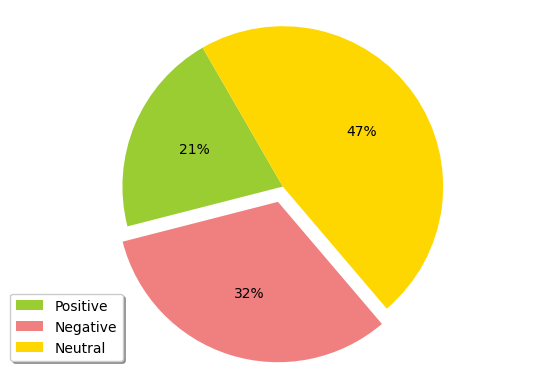

In [18]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.lf%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig('sentiment_analysis.png')

<BarContainer object of 3 artists>

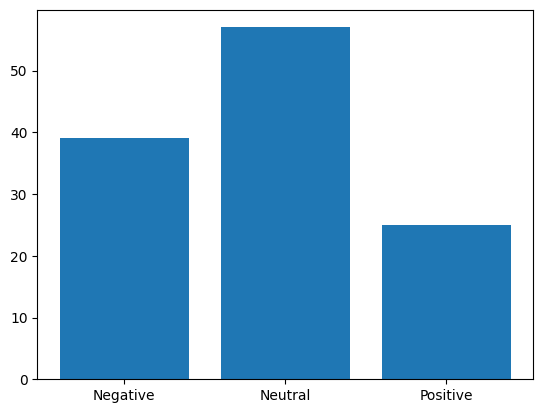

In [19]:
labels=df.groupby('score').count().index.values
values=df.groupby('score').size().values
plt.bar(labels,values)

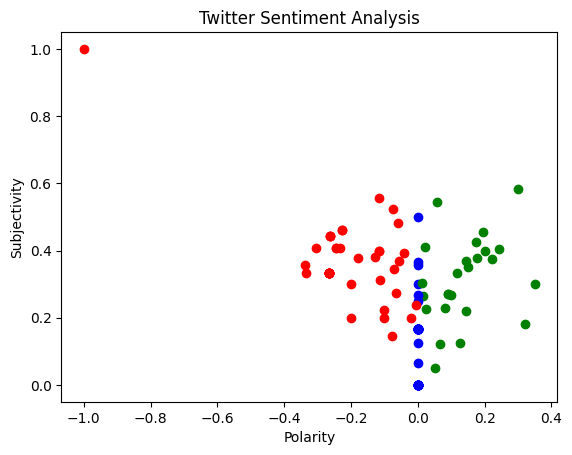

In [20]:
for index,row in df.iterrows():
    if row['score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
        
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [21]:
df=df.drop(['Datetime','Username'],axis=1)

In [22]:
df

,Unnamed: 0,Tweet Id,Text,Subjectivity,Polarity,score
0,0,1550257056480825345,Improve the financial condition of not only...,0.355556,0.000000,Neutral
1,1,1539536239560654848,...,0.300000,0.350000,Positive
2,2,1536975856765022209,Who said we are going to be super power 99...,0.405303,0.242424,Positive
3,3,1528064456978157568,"Sir ji, please clear the waiting list of al...",0.406250,-0.233750,Negative
4,4,1527525074080653312,"Respected Sir, hurry up the army exam, Bachch...",0.355556,-0.336667,Negative
...,...,...,...,...,...,...
116,116,873141128266006528,"Amid violent farmer protests, HM says govt is...",0.333333,-0.266667,Negative
117,117,873140408913612801,"Amid violent Farmer Protests, says govt is wo...",0.333333,-0.266667,Negative
118,118,873140203669540864,"Amid violent FarmerProtests, says govt is wor...",0.333333,-0.266667,Negative
119,119,873139342239125505,"Amid violent FarmerProtests, says govt is wor...",0.333333,-0.266667,Negative


In [23]:
df=df.loc[:,~df.columns.str.contains('Unnamed')]

In [24]:
df

,Tweet Id,Text,Subjectivity,Polarity,score
0,1550257056480825345,Improve the financial condition of not only...,0.355556,0.000000,Neutral
1,1539536239560654848,...,0.300000,0.350000,Positive
2,1536975856765022209,Who said we are going to be super power 99...,0.405303,0.242424,Positive
3,1528064456978157568,"Sir ji, please clear the waiting list of al...",0.406250,-0.233750,Negative
4,1527525074080653312,"Respected Sir, hurry up the army exam, Bachch...",0.355556,-0.336667,Negative
...,...,...,...,...,...
116,873141128266006528,"Amid violent farmer protests, HM says govt is...",0.333333,-0.266667,Negative
117,873140408913612801,"Amid violent Farmer Protests, says govt is wo...",0.333333,-0.266667,Negative
118,873140203669540864,"Amid violent FarmerProtests, says govt is wor...",0.333333,-0.266667,Negative
119,873139342239125505,"Amid violent FarmerProtests, says govt is wor...",0.333333,-0.266667,Negative


In [25]:
df.to_csv("C:\\Users\\Shubham\\Desktop\\clean project\\rajnath singh finance_clean.csv")